# Key Scheduling Time 🔑

### Importing Dependency

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from aes128 import AES as AES_128
from aes192 import AES as AES_192
from aes256 import AES as AES_256
from aes512 import AES as AES_512
import string
import random
from timeit import default_timer as timer
import seaborn as sns

aes128 = AES_128()
aes192 = AES_192()
aes256 = AES_256()
aes512 = AES_512()

observation = 100000
KEY = []
TIME1 = []
TIME2 = []
TIME3 = []
TIME4 = []
COLOR = ['darkorchid', 'orange', 'teal', 'tomato']

#### Random String Generation of Given Length

In [2]:
def generateRandomKey(size=16):
    res = ''.join(random.choices(string.ascii_lowercase + string.digits, k=size))
    return res

for i in range(observation):
    KEY.append(generateRandomKey(64))

##### `AES-128`, `AES-192`,  `AES-256` and `AES-512`

In [3]:
# AES-128
for i in range(observation):
    START = timer()
    aes128.keySchedule(KEY[i][:16])
    END = timer()
    TIME1.append(END-START)
    
# AES-192
for i in range(observation):
    START = timer()
    aes192.keySchedule(KEY[i][:24])
    END = timer()
    TIME2.append(END-START)

# AES-256
for i in range(observation):
    START = timer()
    aes256.keySchedule(KEY[i][:32])
    END = timer()
    TIME3.append(END-START)

# AES-512
for i in range(observation):
    START = timer()
    aes512.keySchedule(KEY[i])
    END = timer()
    TIME4.append(END-START)
    
    
data = {
    "key": KEY,
    "128": TIME1,
    "192": TIME2,
    "256": TIME3,
    "512": TIME4
}


df = pd.DataFrame(data)
    
display(df)

,key,128,192,256,512
0,prb3blz3ykzdb60d8epvnzybi4r8d0jcinkoazbgoh4kuq...,0.001746,0.000264,0.000608,0.000479
1,zmsefhlq6g8ytbb68zpuldyy50hycnmvjqb3wxjnmfenkf...,0.001668,0.000233,0.000568,0.000454
2,akc5xmxw915n2v5kmuauypblsdyvo2kk9xpree7vo3ln43...,0.000516,0.000225,0.000550,0.000437
3,lmsb2ybm73fee9oc5a3bu821gkdng72g9edcxykve70x8n...,0.000479,0.000250,0.000552,0.000435
4,q956rkem2mdxdy6y8pxspn3odmjptrbjbmot1ve28qpnbo...,0.000415,0.000231,0.000549,0.000432
...,...,...,...,...,...
99995,1ynjjb9ag4udbuxhrkvj2ihitg4n1jg3ar8utt5ylyz48m...,0.000207,0.000472,0.000255,0.000426
99996,uhegz6hd9qbs45e008f8z5gpphvahxof2r91tg4zeu4pva...,0.000205,0.000465,0.000252,0.000425
99997,45gromzxzkl7jsc5qhujdk9nx4d35kdjq77e34s1sq61m9...,0.000207,0.000464,0.000258,0.000427
99998,nyn70vasfwftrfewxiyer88of13rs7umj1p9osjuk6n8af...,0.000208,0.000471,0.000255,0.000430


## Graph Plot

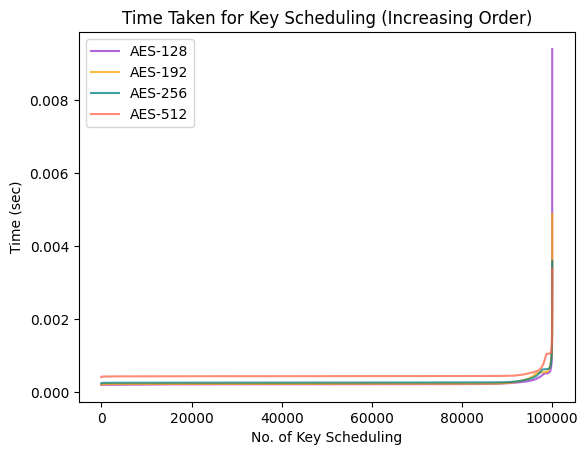

In [4]:
#Plot a line graph
plt.plot(sorted(TIME1), color=COLOR[0], alpha=0.75, label='AES-128')
plt.plot(sorted(TIME2), color=COLOR[1], alpha=0.75, label='AES-192')
plt.plot(sorted(TIME3), color=COLOR[2], alpha=0.75, label='AES-256')
plt.plot(sorted(TIME4), color=COLOR[3], alpha=0.75, label='AES-512')

# Add labels and title
plt.xlabel("No. of Key Scheduling")
plt.ylabel("Time (sec)")
plt.title("Time Taken for Key Scheduling (Increasing Order)")
plt.legend()
plt.show()

## Average Time

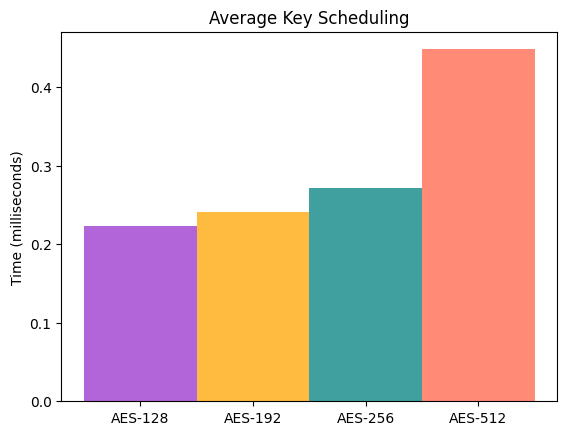

In [5]:
mean128 = df['128'].mean()*1000
mean192 = df['192'].mean()*1000
mean256 = df['256'].mean()*1000
mean512 = df['512'].mean()*1000

aes = ['AES-128', 'AES-192', 'AES-256', 'AES-512']
plt.bar( aes[0], mean128, color=COLOR[0], width = 1, alpha=0.75)
plt.bar( aes[1], mean192, color=COLOR[1], width = 1, alpha=0.75)
plt.bar( aes[2], mean256, color=COLOR[2], width = 1, alpha=0.75)
plt.bar( aes[3], mean512, color=COLOR[3], width = 1, alpha=0.75)
 
plt.ylabel("Time (milliseconds)")
plt.title("Average Key Scheduling")
plt.show()

## Box Plot

Text(0.5, 1.0, 'AES Key Scheduling')

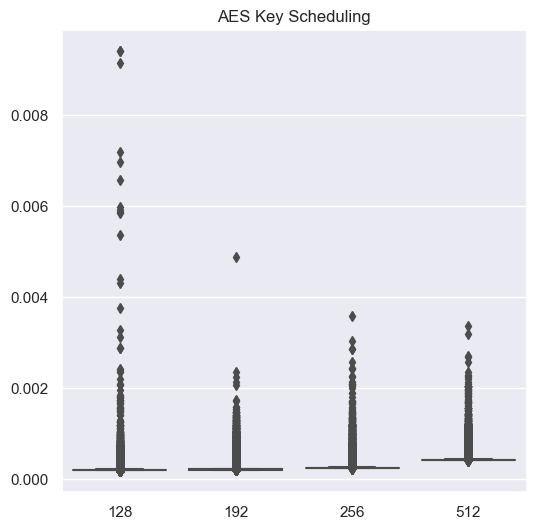

In [6]:
# With Outlier
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(6,6)})
sns.boxplot(data=df).set_title("AES Key Scheduling")

In [7]:
class Quatile_Capping:
    
    def __init__(self, dfx, rangeVal=0.1):
        self.dfx = dfx
        self.rangeVal = rangeVal
        self.boundary()
        
    def boundary(self):
        self.boundary = dict() 
        for i in self.dfx:
            if(self.dfx.dtypes[i] == 'float64'):
                ll = self.dfx[i].quantile(self.rangeVal)  #10 quatile
                ul = self.dfx[i].quantile(1-self.rangeVal)  #90 quatile
                self.boundary[i] = (ll,ul)
    
    def impute(self):
        x = self.dfx.copy()
        for i in self.boundary:
            x[i] = np.where(x[i]>self.boundary[i][1], self.boundary[i][1], x[i])
            x[i] = np.where(x[i]<self.boundary[i][0], self.boundary[i][0], x[i])
        return x

Text(0.5, 1.0, 'AES Key Scheduling')

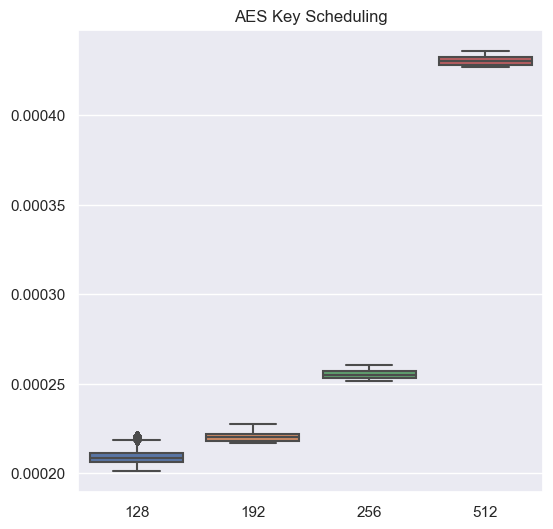

In [8]:
# Outlier (12.5-87.5)
box = Quatile_Capping(df,0.125)
box = box.impute()
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(6,6)})
sns.boxplot(data=box).set_title("AES Key Scheduling")

Text(0.5, 1.0, 'AES Key Scheduling')

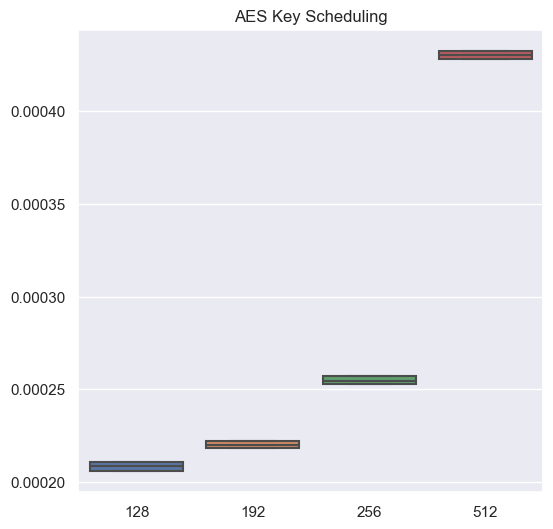

In [9]:
# Outlier (25-75)
box = Quatile_Capping(df,0.25)
box = box.impute()
sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(6,6)})
sns.boxplot(data=box).set_title("AES Key Scheduling")

## **📌 Observation**

- Average Time taken for Key Scheduling is **almost same for AES-128, AES-192 and AES-256**. (4x4 matrix)
- Average Time taken for **AES-512 Key Scheduling is twice** than the previous as it consist of 8x8 matrix
- On average AES 512 varies atmost **2 milliseconds** more than AES-128, AES-192 and AES-256.

In [10]:
df.describe()

,128,192,256,512
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.000223,0.000240,0.000272,0.000448
std,0.000102,0.000084,0.000081,0.000093
min,0.000190,0.000201,0.000235,0.000403
25%,0.000206,0.000218,0.000253,0.000428
50%,0.000208,0.000220,0.000255,0.000430
75%,0.000211,0.000222,0.000257,0.000433
max,0.009403,0.004878,0.003578,0.003369


- The graph obtained by Key Scheduling Algorithm is **Exponential**